# Deep Learning tutorial

This course is an introduction to deep learning techniques. It focuses on a few basic architectures, including dense and CNN, and on training techniques such as dropout and batch normalization. By the end of the course, you will learn how to solve a couple of typical problems with neural networks and understand enough vocabulary and concepts to continue your education in deep learning.

This course does not cover deep learning theory. And if you want a more detailed introduction, you should wath the video of the amazing Tensorflow tutorial [talk](https://youtu.be/vq2nnJ4g6N0) given by Martin Gorner (with the annotated slides [1](https://goo.gl/pHeXe7) [2](https://goo.gl/jrd7AR)). This tutorial is mainly inspired by this talk.

![Deep learning without a phd](https://cloud.google.com/blog/big-data/2017/01/images/148476120123151/deep-learning-with-tensorflow-1.png "Martin Gorner's talk")

## Tutorial content

This tutorial can be found [here](https://github.com/Matt3164/Fashion_Keras). Or you can directly clone the repository:

```bash
git clone https://github.com/Matt3164/Fashion_Keras
```

* 1 - DL tutorial - Simple NN.ipynb : Data loading and first neural net
* 2 - DL tutorial - sigmoid NN.ipynb : Better structure
* 3 - DL Tutorial - NN and dropout.ipynb : Fighting overfitting
* 4 - DL tutorial - 1st CNN.ipynb : First CNN	
* 5 - DL Tutorial - Batch norm.ipynb : Batch normalisation applied on a simple net
* 6 - DL Tutorial - CNN and batchNorm.ipynb : Batch normalisation and CNN
* 7 - DL tutorial - Data augmentation.ipynb : What is data augmentation

 

## Dependencies



The tutorial is based on the high level API keras.

![keras_logo](https://keras.io/img/keras-logo-small.jpg "Keras logo")

Keras is a minimalist, modular neural network library that can use either Theano or TensorFlow as a backend. The primary motivation behind Keras is that you should be able to experiment fast and go from idea to result as quickly as possible. Thus, Keras is perfect for training purposes and tutorials for beginners. Building networks in Keras feels easy and natural. It includes some of the latest state-of-the-art algorithms for optimizers (Adam, RMSProp), normalization (BatchNorm), and activation layers (PReLU, ELU, LeakyReLU). Although, Keras does not support multi-GPU environments for training a network in parallel.

On the hand, Tensorflow is faster, supports multi-GPUs but is more complex to understand. If you are interested, please check the Tensorflow documentation and see for yourself.

Remember to install it before running the notebook:

```bash
pip install keras
```

PS: For a list of many available DL libraries, check [this blog post](http://www.pyimagesearch.com/2016/06/27/my-top-9-favorite-python-deep-learning-libraries/)

## Data

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits but is more complex.

Here's an example how the data looks (each class takes three-rows):

![fashion_mnist](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png "fashion MNIST")

You can find the official benchmark here but it does not contain deep learning performances. The performance on DL methods is expected to be between 90% and 95% on the test set according to the [community](https://medium.com/tensorist/classifying-fashion-articles-using-tensorflow-fashion-mnist-f22e8a04728a).

## Let's go


In [3]:
# Importing dependencies
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Download the data into data/fashion.

In [10]:
!mkdir -p data/fashion
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
!mv *.gz data/fashion/

--2017-09-21 08:07:21--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.31
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  18.4MB/s    in 1.4s    

2017-09-21 08:07:23 (18.4 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2017-09-21 08:07:23--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.31
Connecting to fashion-mnist.s3-website.eu-central-1.amazona

Load the data into arrays

In [11]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [12]:
print("Number of images for training: {}".format(X_train.shape[0]))
print("Number of images for testing: {}".format(X_test.shape[0]))

Number of images for training: 60000
Number of images for testing: 10000


Display the first image

(-0.5, 27.5, 27.5, -0.5)

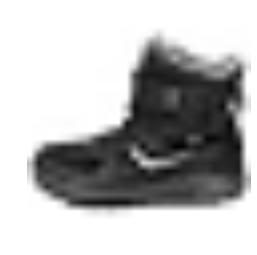

In [13]:
plt.imshow(X_train[0,:].reshape(28, 28), cmap='Greys')
plt.axis("off")

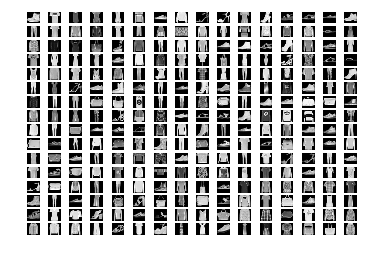

In [14]:
from itertools import product

gridSize=16

for ind in range(gridSize*gridSize):
    plt.subplot(gridSize, gridSize, ind+1)
    plt.imshow(X_train[ind, :].reshape(28, 28), cmap="gray")
    plt.axis("off")

Here is the label map meaning the association between class index and class.

In [15]:
Labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

l, c = np.unique(y_train, return_counts=True)

for idx, count in zip(l, c):
    print("{0}: {1}".format(Labels[idx], count))

T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


Class should be indicated with 0s and 1s over class index. That's why one hot encoding is applied.

In [17]:
from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)

### Build your first network in Keras

The simplest structure is just a matrix multiplication and an activation.

$$ Y = softmax(X.W+b) $$

Here, $X \rightarrow [?, 28*28]$ and $W \rightarrow [?,28*28,10]$ (10 as the number of classes).

To evaluate and optimize the weights, we use the cross entropy as a loss function 

<img src="./images/cross-entropy.png" alt="Cross entropy" style="width: 700px;"/>

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.metrics as metrics

model = Sequential()
model.add(Dense(units=10, input_dim=X_train.shape[1]))
model.add(Activation('softmax'))


def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
             metrics=[metrics.categorical_accuracy, top3_acc])

### Let's train

In [20]:
%%time
history = model.fit(X_train, y_train_ohe, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 12.9017 - categorical_accuracy: 0.1996 - top3_acc: 1.0000     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 12.9017 - categorical_accuracy: 0.1996 - top3_acc: 1.0000     
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 12.9017 - categorical_accuracy: 0.1996 - top3_acc: 1.0000     
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 12.9017 - categorical_accuracy: 0.1996 - top3_acc: 1.0000     
Epoch 5/5
60000/60000 [==============================] - 2s - loss: 12.9017 - categorical_accuracy: 0.1996 - top3_acc: 1.0000     
CPU times: user 10.6 s, sys: 191 ms, total: 10.8 s
Wall time: 11.4 s


It is common to plot different values obtained during training (by epoch). Keras provides some convenient utilities to do so.

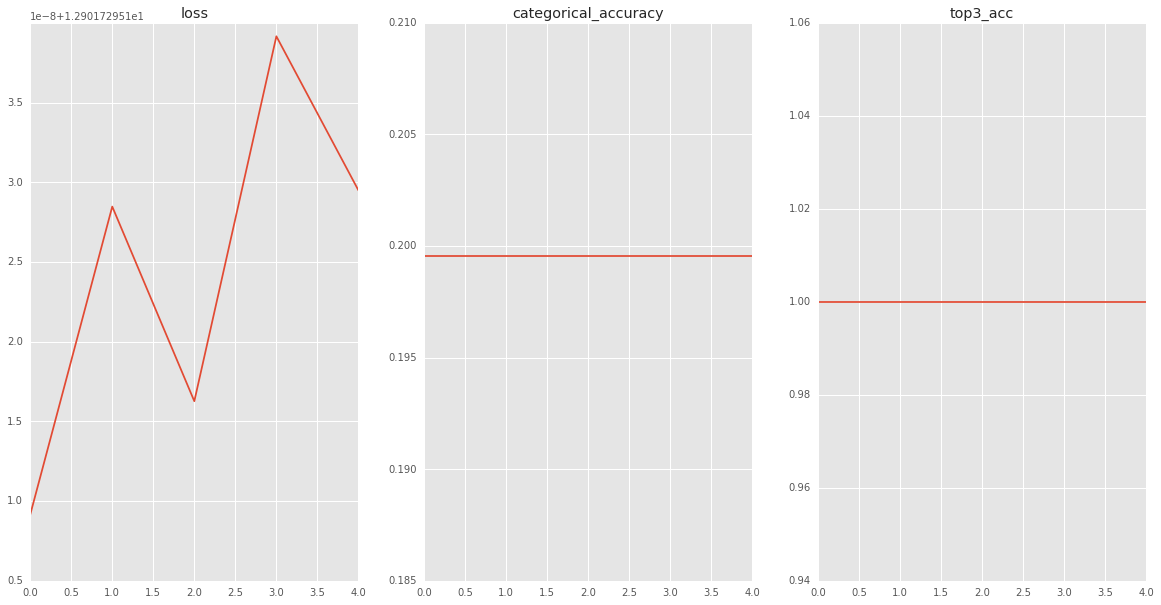

In [22]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

predictions = model.predict(X_test).argmax(axis=1)

print("Accuracy: ")

print(accuracy_score(predictions, y_test))

print("\n\n")

print("Confusion matrix: ")

print(confusion_matrix(predictions, y_test))

print("\n\n")

print(classification_report(predictions, y_test, target_names=Labels))

Accuracy: 
0.1993



Confusion matrix: 
[[   0    0    0    0    0    0    0    0    0    0]
 [ 964  994  884  990  917    1  880    0   86    1]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [  36    6  116   10   83  999  120 1000  914  999]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]



             precision    recall  f1-score   support

T-shirt/top       0.00      0.00      0.00         0
    Trouser       0.99      0.17      0.30      5717
   Pullover       0.00      0.00      0.00         0
      Dress       0.00      0.00      0.00         0
       Coat       0.00      0.00      0.00         0
     Sandal       1.00      0.23      0.38      4283
      Shirt       0.00      0.00      0.00         0
 

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Based on these metrics, what are the effects on the learning rate? the batch size?

PS: First, find these quantities in the code.

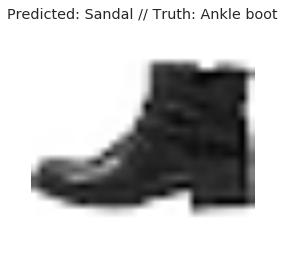

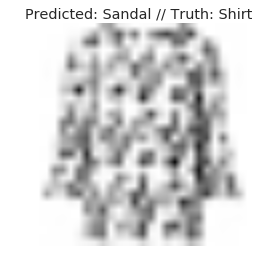

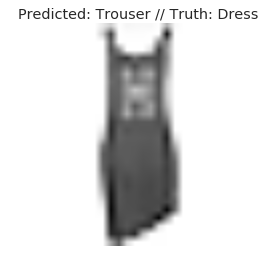

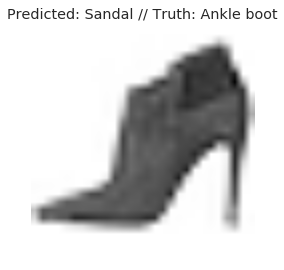

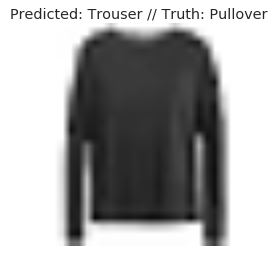

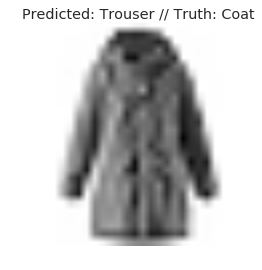

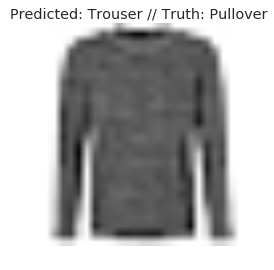

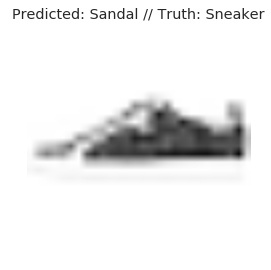

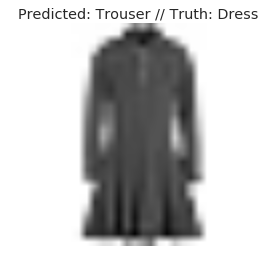

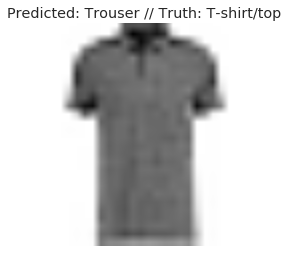

In [25]:
import random

wrong_predictions = (predictions != y_test)

n_wp = wrong_predictions.sum()

N = 10

for i in range(N):
    
    idx = random.choice(range(n_wp))
    plt.figure()
    plt.imshow(X_test[wrong_predictions,::][idx,::].reshape(28, 28), cmap="Greys")
    
    plt.axis("off")
    
    
    plt.title("Predicted: {0} // Truth: {1}".format(
        Labels[predictions[wrong_predictions][idx]],
        Labels[y_test[wrong_predictions][idx]]
    ))

<img src="https://cloud.google.com/blog/big-data/2017/01/images/148476120123151/deep-learning-with-tensorflow-5.png" alt="the end" style="width: 700px;"/>